<a href="https://colab.research.google.com/github/steeve85ok/SIM_YAC_ALMEIDA_UPSE2023/blob/main/ex26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

26.	Resuelva el siguiente ejercicio implementando un esquema explicito obteniendo distribución de Presiones en PSI y Caudales en Ft^3/Hora

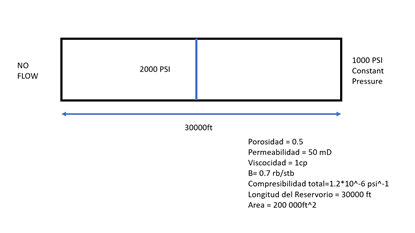

In [ ]:
import numpy  as np
import math

In [ ]:
L=30000                 #Longitud total del yacimiento ft
dx=150                  #espacios entre nodos
Tiempo=100000           # tiempo en días es obtenido por (numero de iteraciones * dt= numero de días)
DT=10                   # intervalo de tiempo por día
K=50                    #Permeabilidad MD
por=0.5                 #porosidad
vis=1                   # centipoise      #viscosidad
Beta=0.7                #factor volumetrico
CompTotal=1.2**(-6)     #psi-1 #compresibilidad total
A=200000                #ft^2           #area de yacimiento

In [ ]:

Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2) #por lo general eta es < que 0.5 para que el sistema sea estable
Eta

0.13271039999999995

In [ ]:
#Esquema Explícito Pi(**)n+1=Pi(**)n + alphaDT/dx**2 [Pi-1(**)n - 2Pi(**)n + Pi+1(**)n], considerar Eta=alphaDT/dx2, Estable: Eta menor 0.5
def Presdt(P0,P1,P2,Eta):    # (funcion esquema eplicito usando Eta en lugar DT y dx)
  Pdt=P1+Eta*(P0-(2*P1)+P2)
  return(Pdt)
#corrección de condicion de frontera de dirichlet generalmente se la usa en la frontera izquierda   Pi(**)n+1 = eta(2Pbizq-Pi(**)n) + (1-2eta)Pi(**)n + eta Pi+1(**)n
Pexplicita=np.zeros((Tiempo//DT,(L//dx)+2)) #  matriz que va a guardar todos los resultados. Filas N: Iteraciones, Columnas m: numero de Nodos: division long yac / dx = 200 (+2 que son las fronteras)


In [ ]:
#Condiciones iniciales esuqema explícito
Pyac=2000                 # presion de yacimiento psi # se da valores al vector de presiones inciales
Piz=0                     # presion frontera izquierda psi
Pder=1000                 # presion frontera derecha psi
Pin=np.ones((L//dx)+2)    # vector de presiones iniciales (es cantidad de nodos y los datos están con unos), la corrección de condiciones de frontera es añadir dos nodos uno por extremo, es por esta razon que sumamos 2
Pres=np.zeros((L//dx)+2)  # vector de resultados: vector vacio zeros que representa las condiciones iniciales.(cantidad de nodos de la matriz+2) creación de una matriz vacia con las mismas dimensiones de la matriz de donde se guardara todo los resultados
Pres2=np.zeros((L//dx)+2) # vector de resultados para la solucion implicita (si fuera necesario)
Pin=Pin*Pyac              # valores del vector incial como presion de yacimiento (tiempo=0); definición para obtener las demas celdas de la primera fila de la matriz sin contar los extremos
#Atribuir valores al vector d condiciones iniciales
Pin[0]=2*Piz-Pin[1]       # primera celda (0) del vector Pin será Presión CORREGIDA  igual a dos veces de la presion de la izquierda menos la presión pinicial de 1
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]    # ultima celda del vector Pin menos 1 en python es presión final CORREGIDA es igual a  a dos veces la presión de la derecha menos la presión de la anterior que seria la longitud  de Pin menos 2

Pin                       # despliega el vector de presiones iniciales


array([-2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
      

In [ ]:
Pin.shape # dimension del vector de presiones incial : 200 nodos mas 2; division long yac para dx = 200 (+2 que son las fronteras)

(202,)

In [ ]:
Pin[0] # Orden de ubcaciones de pyton:valor de la primera celda (primera fila y primera columna); representa la correccion de la frontera izquierda

-2000.0

In [ ]:
Pin[len(Pin)-1] # Orden de ubcaciones de pyton: valor de la ultima celda (primera fila y última columna y ); representa la correccion de la frontera dereca

0.0

In [ ]:
len(Pin) # cantidad de elementos del vector incial

202

In [ ]:
Pexplicita.shape # dimension de Matriz explicita, numero de filas=Teimpo/DT; columnas= nodos + 2 (correctivos)

(10000, 202)

Ciclo explicito en base al tiempo y espacio

In [ ]:
t=DT                              # Tiempo que ha tarnscurrido despues del tiempo=0
Pexplicita[0]=Pin                 # en la matriz Pexplicita, la presion de la primera fila será la presión incial(0). Presion explicita de la PRIMERA fila cero va ser igual a la presion inicial. Le da el valor inicial a la fila cero
while t<Tiempo:                   # Creación del ciclo while es en base al tiempo; Se empieza calculos llenarán la fila 2,3,... (se tendran resultados con una iteracion menos)
  for i in range(0,len(Pin)-1):   # creacion del ciclo de espacio Ciclo For (columnas: (0)es primer valor, (Pin)-1 es ultimo valor); este codigo indica toda la fila de condiciones iniciales
    if i==0:                      # i==0 representa la posición del nodo en todos los puntos de la frontera izquierda # cuando i vale cero nos referimos al primer nodo izq, de la fila t=0 condicones iniciales
      Pres[i]=2*Piz-Pin[1]        # Pin[0]=2*Piz-Pin[1] definido en condiciones iniciales, (con vector de resultados Pres se llenan  todos los valores de la columna en i =0, frontera izq) #se edito por las correcciones dirichlet de frontera, nueva ecuac# # Presión de resultado evaluado en i va ser la misma presion de la condición inicial
    elif i==len(Pin)-1:            # posición de i en frontera derecha #representa el ultimo nodo (fila lado derecho) que es la longitud del vector de la fila t=0 de las condiciones iniciales
      Pres[i]=2*Pder-Pin[len(Pin)-2]     # Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2] definido en condiciones iniciales, (así se llenan todos los valores de la columna final i = num nodos menos 1, frontera der) # se edito##La presion de resultado es igual a la presion inicial del ultimo nodo final derecho añadido un nodo t=0
    else:                             # en todos los demás puntos  se llamará a la funcion denominada Presdt para las presiones futuras
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)  # triangulo de posicion i, i-1, i+1, con relacion a valores del vector anterior que sería la presion de i-1, presion de i, presion de i+1; factor Eta (dif a 1); con i da cambio nodo por nodo  # llamamos a la función este codigo de presion de resultado nos ayuda a obtener los siguientes nodos(i) de en medio de la fila de dt, y se repite el ciclo para las siguientes dt
  Pexplicita[t//DT]=Pres            # Pres vector pone valores en la siguiente fila de la matriz (sale del condicional)  #MATRIZ de solucion o DE RESULTADOS Los valores calculados de los triangulos se guardaran en la matriz de resultados,tiempo/delta t obtenemos el numero de iteraciones o indices de cada fila/A MEDIDA QUE VAMOS AUMENTANDO EL DT ES IGUAL A LA PRESION CALCULAD
  t=t+DT                           # siguiente ciclo  #este codigo ayudara que las siguientes filas de dt en este caso 3dt en adelante y las siguientes iteraciones se vayan calculando
  Pin=Pres                         # vector inicial recopila al vector de resultads anterior, y llena los triangulos sucesivamente #la presion inicial cambia a medida que vamos llenano los triangulos

In [ ]:
Pexplicita                    # Resultados de la matriz seteada

array([[-2000.        ,  2000.        ,  2000.        , ...,
         2000.        ,  2000.        ,     0.        ],
       [-2000.        ,  1469.1584    ,  2000.        , ...,
         2000.        ,  1734.5792    ,     0.        ],
       [-1469.1584    ,  1149.66140322,  1887.15122469, ...,
         1964.77589946,  1534.9319966 ,     0.        ],
       ...,
       [  -14.38825585,    14.38751064,    43.15691736, ...,
           57.51782556,    28.76304751,     0.        ],
       [  -14.38751064,    14.38676553,    43.15468277, ...,
           57.51483909,    28.76155373,     0.        ],
       [  -14.38676553,    14.38602052,    43.15244847, ...,
           57.51185301,    28.76006015,     0.        ]])

In [ ]:
Pexplicita.shape

(10000, 202)

Graphicar Pexplicita (ver gradiente de presion),1er seteo Pyac=2000, Piz=0, Pder=1000 (forma no sinoidal)  dx= 150; probar con dx=1500 influye numero de nodos (impreciso muy pocos nodos influyen en error)

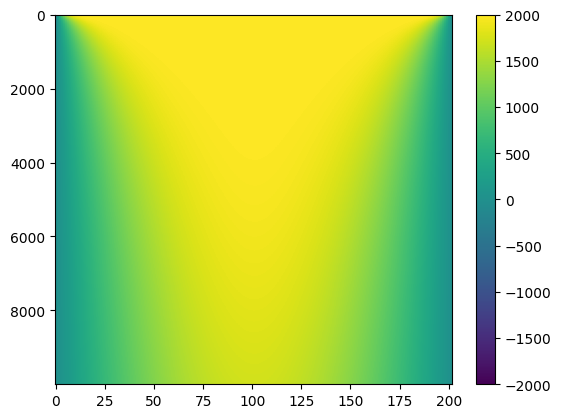

In [ ]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()